In [12]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [3]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),dbscan_cluster,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2, random_state=0)
pca_transform= pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transform[:,0]
irisDF['ftr2'] = pca_transform[:,1]

dbscan_labels = np.unique(irisDF['dbscan_cluster'])
for label in dbscan_labels:
    label_cluster = irisDF[irisDF['dbscan_cluster']==label]
    
    sns.scatterplot(data=irisDF, x=label_cluster['ftr1'], y=label_cluster['ftr2'])

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster 0.8'] = dbscan_labels

irisDF.groupby(['target'])['dbscan_cluster 0.8'].value_counts()

target  dbscan_cluster 0.8
0        0                    50
1        1                    50
2        1                    47
        -1                     3
Name: dbscan_cluster 0.8, dtype: int64

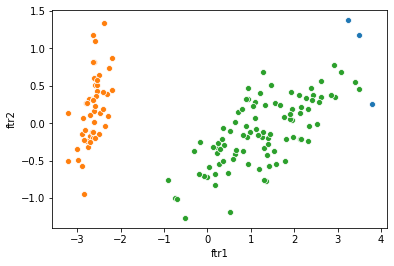

In [6]:
pca = PCA(n_components=2, random_state=0)
pca_transform= pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transform[:,0]
irisDF['ftr2'] = pca_transform[:,1]

dbscan_labels = np.unique(irisDF['dbscan_cluster 0.8'])
for label in dbscan_labels:
    label_cluster = irisDF[irisDF['dbscan_cluster 0.8']==label]
    
    sns.scatterplot(data=irisDF, x=label_cluster['ftr1'], y=label_cluster['ftr2'])

In [10]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

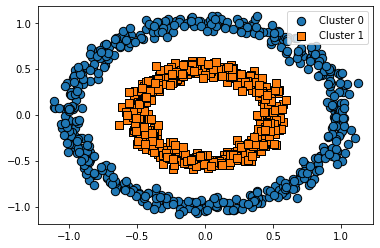

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [14]:
X[:5]

array([[ 0.51978115, -0.01598068],
       [-0.05771881, -0.42027869],
       [-0.80515504, -0.66222735],
       [ 0.31654897,  0.31272992],
       [-0.30480378,  0.40756343]])

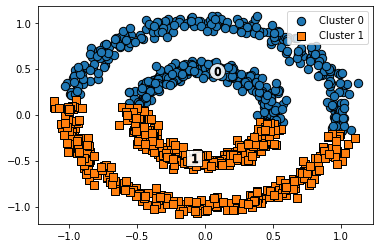

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

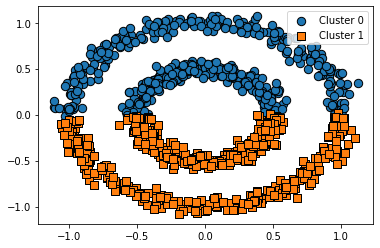

In [21]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

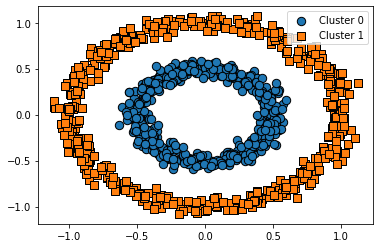

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_label = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_label

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

In [23]:
clusterDF.head()

,ftr1,ftr2,target,kmeans_cluster,gmm_cluster,dbscan_cluster
0,0.519781,-0.015981,1,0,1,0
1,-0.057719,-0.420279,1,1,1,0
2,-0.805155,-0.662227,0,1,1,1
3,0.316549,0.312730,1,0,0,0
4,-0.304804,0.407563,1,0,0,0
